In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
res_py = pd.read_csv("results_py_2.txt")
res_r = pd.read_csv("results-R.txt")

In [25]:
res_r

,Unnamed: 0,files,seed,dof,mae,acc,bacc,cor_spearman,cor_pearson,ts,ss
0,1,/home/julian/Uni/MasterThesis/data/simdata_TS0...,3482,0,2.719023,0.228621,0.142857,NaN,NaN,0.1,0.1
1,2,/home/julian/Uni/MasterThesis/data/simdata_TS0...,7311,0,2.719023,0.228621,0.142857,NaN,NaN,0.1,0.1
2,3,/home/julian/Uni/MasterThesis/data/simdata_TS0...,9808,0,2.719023,0.228621,0.142857,NaN,NaN,0.1,0.1
3,4,/home/julian/Uni/MasterThesis/data/simdata_TS0...,6988,0,2.719023,0.228621,0.142857,NaN,NaN,0.1,0.1
4,5,/home/julian/Uni/MasterThesis/data/simdata_TS0...,1095,0,2.719023,0.228621,0.142857,NaN,NaN,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...
70,71,/home/julian/Uni/MasterThesis/data/simdata_TS0...,5746,6,0.923211,0.436300,0.362671,0.937575,0.947611,0.9,0.1
71,72,/home/julian/Uni/MasterThesis/data/simdata_TS0...,7222,33,0.841187,0.445026,0.370694,0.930801,0.951766,0.9,0.1
72,73,/home/julian/Uni/MasterThesis/data/simdata_TS0...,7057,19,0.881326,0.436300,0.369177,0.940952,0.951722,0.9,0.1
73,74,/home/julian/Uni/MasterThesis/data/simdata_TS0...,3128,8,0.926702,0.424084,0.344893,0.936694,0.950030,0.9,0.1


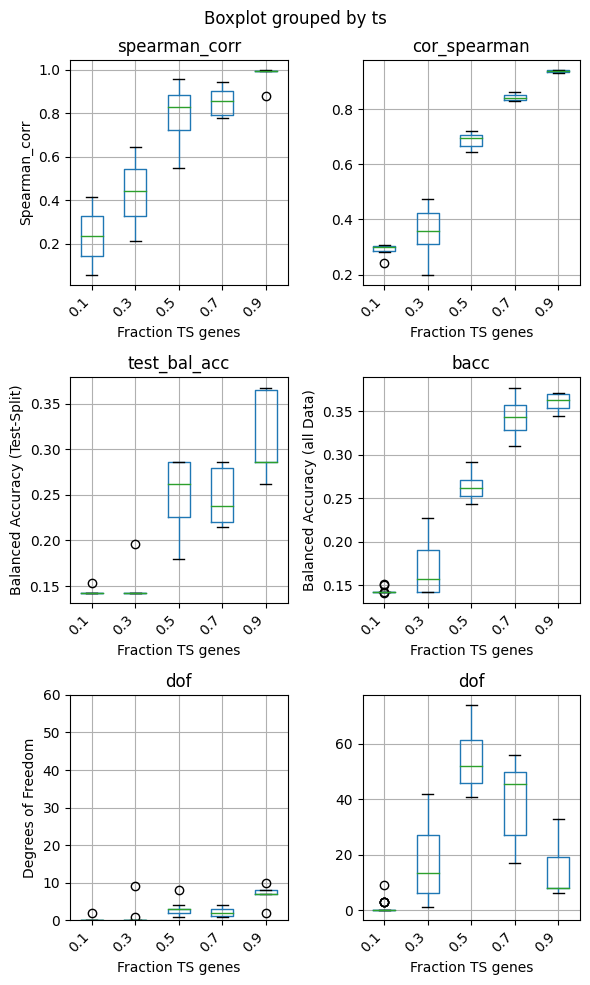

In [47]:
import re

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(6, 10))

# Extract the floating point value after '_TS' in each value of the 'file' column
res_py['ts'] = res_py['file'].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))
res_r['ts'] = res_py['file'].apply(lambda x: re.search(r'_TS(\d+\.\d+)', x).group(1))

# Extract the floating point value after '_TS' in each value of the 'file' column
res_py['ss'] = res_py['file'].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))
res_r['ss'] = res_py['file'].apply(lambda x: re.search(r'_SS(\d+\.\d+)', x).group(1))

res_py.boxplot(column="spearman_corr", by="ts", ax=ax1)
ax1.set_xlabel('Fraction TS genes')
ax1.set_ylabel("Spearman_corr")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha='right')

res_r.boxplot(column="cor_spearman", by="ts", ax=ax2)
ax2.set_xlabel('Fraction TS genes')
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha='right')

res_py.boxplot(column="test_bal_acc", by="ts", ax=ax3)
ax3.set_xlabel('Fraction TS genes')
ax3.set_ylabel("Balanced Accuracy (Test-Split)")
ax3.set_xticks(ax3.get_xticks(), ax3.get_xticklabels(), rotation=45, ha='right')

res_r.boxplot(column="bacc", by="ts", ax=ax4)
ax4.set_xlabel('Fraction TS genes')
ax4.set_ylabel("Balanced Accuracy (all Data)")
ax4.set_xticks(ax4.get_xticks(), ax4.get_xticklabels(), rotation=45, ha='right')

res_py.boxplot(column="dof", by="ts", ax=ax5)
ax5.set_ylim((0,60))
ax5.set_xlabel('Fraction TS genes')
ax5.set_ylabel("Degrees of Freedom")
ax5.set_xticks(ax5.get_xticks(), ax5.get_xticklabels(), rotation=45, ha='right')

res_r.boxplot(column="dof", by="ts", ax=ax6)
ax6.set_xlabel('Fraction TS genes')
ax6.set_xticks(ax6.get_xticks(), ax6.get_xticklabels(), rotation=45, ha='right')


# Display the plot
plt.tight_layout()
plt.show()

In [87]:
genes_py = []
genes_r = []

with open("genes_py_2.txt", "r") as f:
    for i, line in enumerate(f):
        # skip every second line, as it contains weights:
        if i % 2 ==0:
            gs = line.strip().split(", ")
            
            # if line is of length zero, split returns [""]
            if len(gs) == 1 and gs[0] == "":
                genes_py.append([])
            else:
                genes_py.append(gs)

with open("genes-R.txt", "r") as f:
    for line in f:
        gs = line.strip().split(", ")
        
        # if line is of length zero, split returns [""]
        if len(gs) == 1 and gs[0] == "":
            genes_r.append([])
        else:
            genes_r.append(gs)


In [90]:
from sklearn import metrics

for i, (ex1, ex2) in enumerate(zip(genes_py, genes_r)):
    s1, s2 = set(ex1), set(ex2)

    if len(s1) > 0 and len(s2) > 0:
        # dice simmilarity coefficient
        dsc = ( 2 * len(s1.intersection(s2)) ) / ( len(s1) + len(s2) )

        # jaccard score 
        jac = (len(s1.intersection(s2))) / (len(s1.union(s2)))

        # overlap coefficient
        ovl = len(s1.intersection(s2)) / np.min([len(s1), len(s2)])

        print("[%s]:" % i, "overlap:", ovl, "Dice:", dsc, "Jaccard:", jac)

[26]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[29]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[32]: overlap: 0.2727272727272727 Dice: 0.002149767108563239 Jaccard: 0.0010760401721664275
[45]: overlap: 0.6666666666666666 Dice: 0.07272727272727272 Jaccard: 0.03773584905660377
[46]: overlap: 0.3333333333333333 Dice: 0.041666666666666664 Jaccard: 0.02127659574468085
[47]: overlap: 0.5 Dice: 0.02631578947368421 Jaccard: 0.013333333333333334
[48]: overlap: 0.5 Dice: 0.038461538461538464 Jaccard: 0.0196078431372549
[49]: overlap: 0.6666666666666666 Dice: 0.07547169811320754 Jaccard: 0.0392156862745098
[50]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[51]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[52]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[53]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[54]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[55]: overlap: 1.0 Dice: 0.06896551724137931 Jaccard: 0.03571428571428571
[56]: overlap: 0.3333333333333333 Dice: 0.04 Jaccard: 0.02040816326530612
[57]: overlap: 0.0 Dice: 0.0 Jaccard: 0.0
[58]: ov

## Closer look at some genes with little overlap

In [336]:
import scanpy as sc
import os

# the exact experiment of interest
idx = 59

data_dir = "/home/julian/Uni/MasterThesis/data/"
simdata = sc.read_h5ad(os.path.join(data_dir, res_py.iloc[idx].file))

# Union and intersect of the identified genes
union = list(set(genes_py[idx]).union(set(genes_r[idx])))
intersect = list(set(genes_py[idx]).intersection(set(genes_r[idx])))

counts = simdata[:,union].copy()

# Add a column indicating from which tool a gene was called
counts.var["group"] = None
counts.var.loc[genes_py[idx], "group"] = "PY"
counts.var.loc[genes_r[idx], "group"] = "R"
counts.var.loc[intersect, "group"] = "PY,R"

/home/julian/.local/share/virtualenvs/code-tW9RC7Ez/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/julian/.local/share/virtualenvs/code-tW9RC7Ez/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


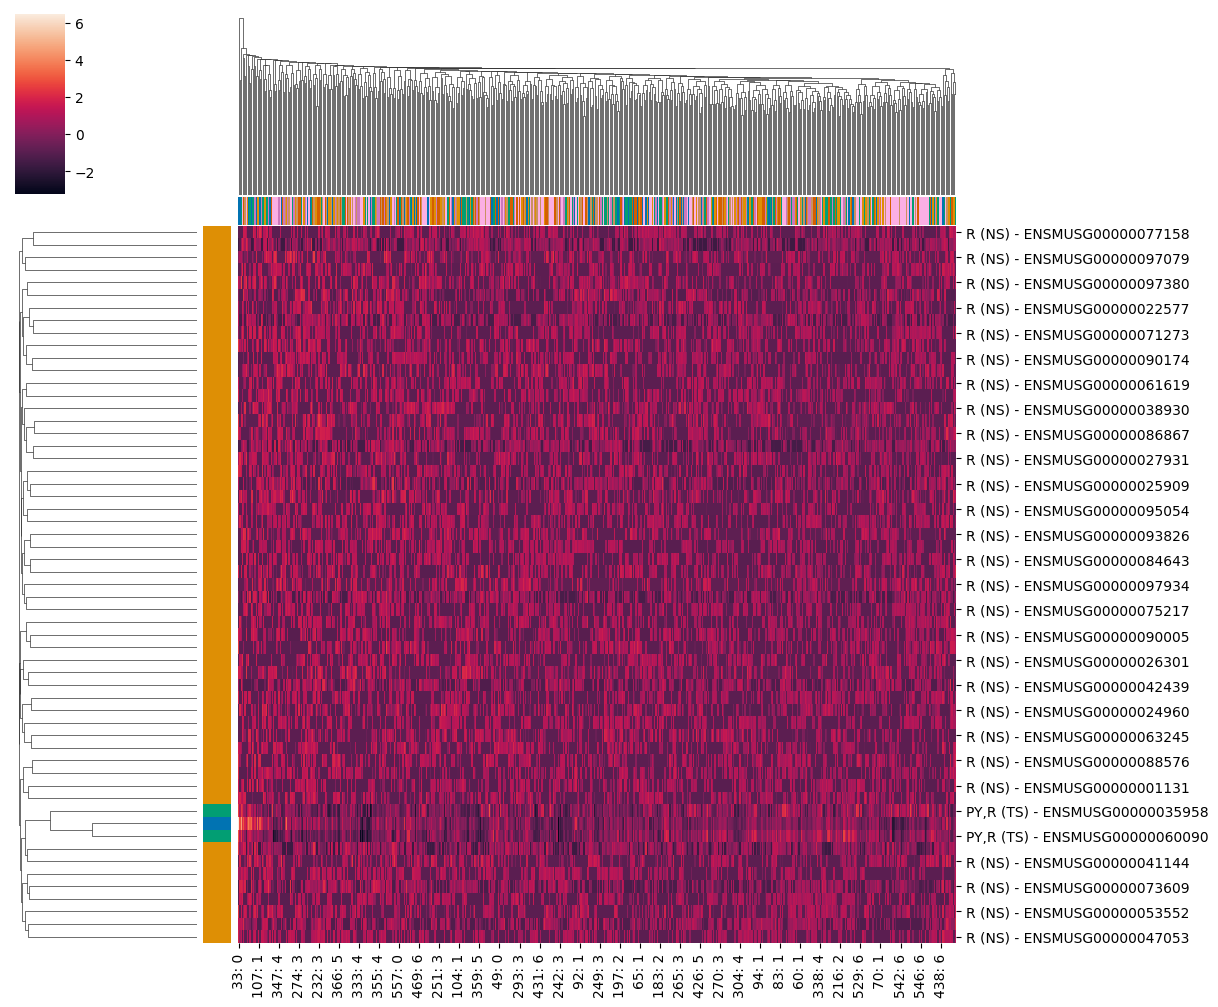

In [337]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns

col_labels = counts.obs.Ordinal_Time_Labels.to_numpy()
cmap = sns.color_palette("colorblind", max(3, len(np.unique(col_labels))))
col_colors = [cmap[e] for e in col_labels]

row_colors = [cmap[0 if e == "PY" else 1 if e == "R" else 2] for e in counts.var["group"].to_numpy()]

g = sns.clustermap(counts.X.T, col_colors=col_colors, row_colors=row_colors)
ordering = g.dendrogram_row.reordered_ind

ylabels = []
# iterate only over the ticks that are plotted!
for text in g.ax_heatmap.get_yticklabels():
    # the Text() object contains the row index as a string
    i = int(text.get_text())
    group = counts.var.iloc[i].group
    setting = counts.var.iloc[i].Setting
    gene_name = counts.var.iloc[i].name
    label = "%s (%s) - %s" % (group, setting, gene_name)
    ylabels.append(label)
g.ax_heatmap.set_yticklabels(ylabels, rotation=0)

xlabels = []
# iterate only over the ticks that are plotted!
for text in g.ax_heatmap.get_xticklabels():
    # the Text() object contains the row index as a string
    i = int(text.get_text())
    time_label = counts.obs.iloc[i].Ordinal_Time_Labels
    label = "%s: %s" % (i, time_label)
    xlabels.append(label)
g.ax_heatmap.set_xticklabels(xlabels, rotation=90)

# Display the plot
plt.show()

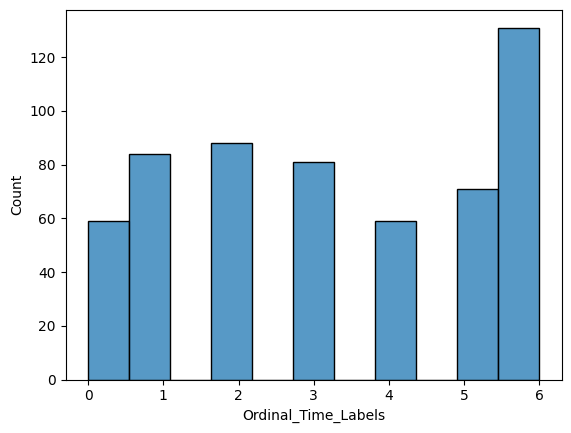

In [338]:
h = sns.histplot(simdata.obs.Ordinal_Time_Labels)